1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

When we have 2 six-sided dice we have 36 possible outcome. The possibility of snake eyes is 1/36(1,1) and sevens is 1/6 [(1,6),(2,5),(3,4),(4,3),(5,2),(7,1)] So rolling sevens is more probable.

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).



# analytically

All possibility : 11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,31,32,33,34,35,36,41,42,43,44,45,46,51,52,53,54,55,56,61,62,63,64,65,66

Sum of 2:11 probability:2.8%

Sum of 3:12,21 probability:5.6%

Sum of 4:13,31,22 probability:8.3%

Sum of 5:14,41,23,32 probability:11.1%

Sum of 6:15,51,24,42,33 probability:13.9%

Sum of 7:16,25,34,43,52,61 probability：16.7%

Sum of 8:26,62,53,35,44 probability：13.9%

Sum of 9:36,63,45,54 probability：11.1%

Sum of 10:46,64,55 probability：8.3%

Sum of 11:56.65 probability：5.6%

Sum of 12:66 probability：2.8%

# numerically

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats,signal
from scipy.stats import poisson,rayleigh
from scipy.signal import convolve
import numpy
import random

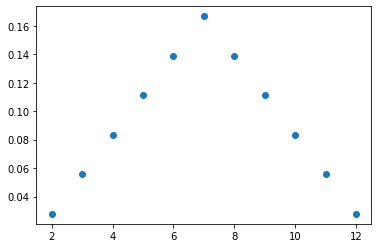

In [13]:
fig, ax = plt.subplots(1,1)
sum_of_dice = np.arange(2,13,1)
#the possiblity of sum of dice are above
possibility = [1/6]*6
#each dice has a possibility of 1/6 of rolling to each number
con_poss = scipy.signal.convolve(possibility,possibility)
#make a consolve of two dice with possibility of 1/6 in range of 2 to 12 we can see the graph like this
ax.plot(sum_of_dice,con_poss,'o')


3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

To calculate the mean we can just use sum of all elements multiplied by their respective probabilities


In [7]:
mean = sum(sum_of_dice*con_poss)
mean

7.0

To calculate the variance we can just take sum of all the differences of each element from the mean, squared, multiplied by their probabilities


In [8]:
variance = sum((sum_of_dice-mean)**2*con_poss)
variance

5.833333333333334

4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.



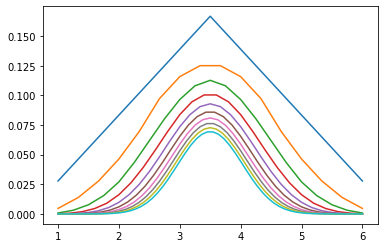

In [23]:
fig, ax = plt.subplots(1,1)
sum_of_dice = np.arange(2,13,1)
possibility = [1/6]*6
con_poss = scipy.signal.convolve(possibility,possibility)
dice=10
av_con_poss=possibility 
for i in range(dice):
    av_con_poss=scipy.signal.convolve(possibility,av_con_poss)
    avx=np.linspace(1, 6, len(av_con_poss))
    ax.plot(avx,av_con_poss)
#The above image is the trend of adding more dice

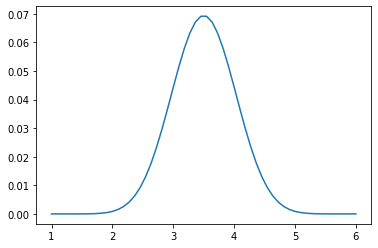

In [25]:
fig, ax = plt.subplots(1,1)
ax.plot(avx,av_con_poss)
#The above image is the graph of average of 10 dices

This graph looks like a Gaussian distribution but it is still not exactly Gaussian distriution because as more dice we have it would become more approximate to gaussian distribution.

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

According to the definition of Gaussian distribution,any linear combination of a fixed collection of normal deviates is a normal deviate, so even we only have 2 dices, it is still a linear combination because the possibility of rolling a dice is always 1/6. As the sum or average Guassian change, the standard deviation would be smaller because the standard diviation is the square root of the two variances added together.